In [1]:
from smach_utils2 import *


[ WARN] [1680633446.555018405]: Link hand_l_finger_vacuum_frame has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1680633446.558909743]: Link head_l_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1680633446.558932961]: Link head_r_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1680633446.559828562]: Group state 'neutral' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1680633446.559848238]: Group state 'go' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1680633447.030878949]: Kinematics solver doesn't support #attempts any

In [2]:
def detect_human_to_tf():
    humanpose=human_detect_server.call()
    print (humanpose)
    if (np.asarray((humanpose.x,humanpose.y,humanpose.z)).all()== np.zeros(3).all()):
        print (np.asarray((humanpose.x,humanpose.y,humanpose.z)))
        return False
    else:
        tf_man.pub_static_tf(np.asarray((humanpose.x,humanpose.x,humanpose.z)),point_name='human', ref='head_rgbd_sensor_link')
        succ=tf_man.change_ref_frame_tf('human')
        return succ


In [10]:
head.set_joint_values([0.0,0.3])

humanpose=detect_human_to_tf()

[ WARN] [1680534968.546887512]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 121.979000 according to authority /pose_integrator
[ WARN] [1680534968.546942815]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 121.979000 according to authority /pose_integrator
[ WARN] [1680534968.546974773]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 121.979000 according to authority /pose_integrator
[ WARN] [1680534968.547018539]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 121.979000 according to authority /pose_integrator
[ WARN] [1680534968.826286822]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 122.087000 according to authority /pose_integrator
[ WARN] [1680534968.826354934]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 122.087000 according to authority /pose_integrator
[ WARN] [1680534968.82639474

x: -0.31356313824653625
y: -0.7879580855369568
z: 2.300804376602173


In [11]:
humanpose 

True

[ WARN] [1680535002.847622830]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 132.676000 according to authority /pose_integrator
[ WARN] [1680535002.847685049]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 132.676000 according to authority /pose_integrator
[ WARN] [1680535002.847732515]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 132.676000 according to authority /pose_integrator
[ WARN] [1680535002.847774614]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 132.676000 according to authority /pose_integrator


In [12]:
if humanpose== False:
    print ('no human ')
    #omni_base.move_base(1,3.4,np.pi)
        
    res = omni_base.move_base(known_location='room1')


else:
    print('getting close to human')
    head.to_tf('human')
    omni_base.move_d_to(1.6,'human')
    head.to_tf('human')
    print ( "is he drinking?")
    

getting close to human


[ WARN] [1680535005.344008205]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 133.618000 according to authority /pose_integrator
[ WARN] [1680535005.344085149]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 133.618000 according to authority /pose_integrator
[ WARN] [1680535005.344118839]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 133.618000 according to authority /pose_integrator
[ WARN] [1680535005.344154298]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 133.618000 according to authority /pose_integrator


header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
goal_id: 
  stamp: 
    secs: 0
    nsecs:         0
  id: ''
goal: 
  x: 2.0959229445912944
  y: 0.5975385581853991
  yaw: -3.129952652349871
  timeout: 30
  known_location: "None"


[ WARN] [1680535011.861126038]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 135.896000 according to authority /pose_integrator
[ WARN] [1680535011.861170959]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 135.896000 according to authority /pose_integrator
[ WARN] [1680535011.861208239]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 135.896000 according to authority /pose_integrator
[ WARN] [1680535011.861232882]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 135.896000 according to authority /pose_integrator


is he drinking?


[ WARN] [1680535020.538433378]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 139.146000 according to authority /pose_integrator
[ WARN] [1680535020.538482780]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 139.146000 according to authority /pose_integrator
[ WARN] [1680535020.538513933]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 139.146000 according to authority /pose_integrator
[ WARN] [1680535020.538540416]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 139.146000 according to authority /pose_integrator
[ WARN] [1680535022.732213697]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 139.906000 according to authority /pose_integrator
[ WARN] [1680535022.732274144]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 139.906000 according to authority /pose_integrator
[ WARN] [1680535022.73231652

In [13]:
### Wearing shoes?
##Look at human's feet
human_pos,_=tf_man.getTF('human')
head.absolute(human_pos[0],human_pos[1],0.1)
res=segmentation_server.call()

[ WARN] [1680535043.581568924]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 147.688000 according to authority /pose_integrator
[ WARN] [1680535043.581613953]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 147.688000 according to authority /pose_integrator
[ WARN] [1680535043.581645508]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 147.688000 according to authority /pose_integrator
[ WARN] [1680535043.581668873]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 147.688000 according to authority /pose_integrator
[ WARN] [1680535047.091200229]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 148.827000 according to authority /pose_integrator
[ WARN] [1680535047.091247168]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 148.827000 according to authority /pose_integrator
[ WARN] [1680535047.09127527

[ WARN] [1680535102.471232760]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 170.466000 according to authority /pose_integrator
[ WARN] [1680535102.471322505]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 170.466000 according to authority /pose_integrator
[ WARN] [1680535102.471356662]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 170.466000 according to authority /pose_integrator
[ WARN] [1680535102.471384214]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 170.466000 according to authority /pose_integrator
[ WARN] [1680535109.291681355]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 173.225000 according to authority /pose_integrator
[ WARN] [1680535109.291739991]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 173.225000 according to authority /pose_integrator
[ WARN] [1680535109.29179631

[ WARN] [1680535196.872238103]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.685000 according to authority /pose_integrator
[ WARN] [1680535196.872300075]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.685000 according to authority /pose_integrator
[ WARN] [1680535196.872339433]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.685000 according to authority /pose_integrator
[ WARN] [1680535196.872377334]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.685000 according to authority /pose_integrator
[ WARN] [1680535197.384063101]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.917000 according to authority /pose_integrator
[ WARN] [1680535197.384122873]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 207.917000 according to authority /pose_integrator
[ WARN] [1680535197.38417179

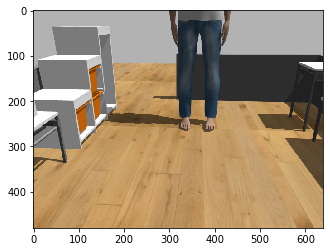

[ WARN] [1680535209.276817030]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.526000 according to authority /pose_integrator
[ WARN] [1680535209.276868663]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.526000 according to authority /pose_integrator
[ WARN] [1680535209.276905954]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.526000 according to authority /pose_integrator
[ WARN] [1680535209.276941701]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 212.526000 according to authority /pose_integrator
[ WARN] [1680535227.318951931]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 219.466000 according to authority /pose_integrator
[ WARN] [1680535227.319008274]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 219.466000 according to authority /pose_integrator
[ WARN] [1680535227.31904746

[ WARN] [1680535268.416773604]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 235.216000 according to authority /pose_integrator
[ WARN] [1680535268.416852213]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 235.216000 according to authority /pose_integrator
[ WARN] [1680535268.416892694]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 235.216000 according to authority /pose_integrator
[ WARN] [1680535268.416927608]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 235.216000 according to authority /pose_integrator
[ WARN] [1680535270.165341848]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 235.822000 according to authority /pose_integrator
[ WARN] [1680535270.165383269]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 235.822000 according to authority /pose_integrator
[ WARN] [1680535270.16541249

In [14]:
import matplotlib.pyplot as plt
img=rgbd.get_image()
plt.imshow(img)

In [ ]:
##Look for rubish near human
head.set_joint_values((0.3,-0.94))
res=segmentation_server.call()


In [6]:
res = omni_base.move_base(known_location='room1')
#res = omni_base.move_base(known_location='Origin')
res

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
goal_id: 
  stamp: 
    secs: 0
    nsecs:         0
  id: ''
goal: 
  x: 0.0
  y: 0.0
  yaw: 0.0
  timeout: 30
  known_location: "room1"


3

[ WARN] [1680534857.628739466]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 82.620000 according to authority /pose_integrator
[ WARN] [1680534857.628786847]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 82.620000 according to authority /pose_integrator
[ WARN] [1680534857.628824673]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 82.620000 according to authority /pose_integrator
[ WARN] [1680534857.628859377]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 82.620000 according to authority /pose_integrator
[ WARN] [1680534858.470266214]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 82.997000 according to authority /pose_integrator
[ WARN] [1680534858.470307026]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 82.997000 according to authority /pose_integrator
[ WARN] [1680534858.470332497]: TF

In [ ]:
img=rgbd.get_image()
plt.imshow(img)

In [ ]:
head.to_tf('human')
omni_base.move_d_to(1,'human')
head.to_tf('human')
print ( "is he drinking?")

In [ ]:
human_pos,_=tf_man.getTF('human')
human_pos

In [ ]:
res

In [ ]:
omni_base.move_base(0.0,1.6,np.pi*0.5,10)

In [ ]:
head.absolute(1.2,1.9,.5)

In [ ]:
res=segmentation_server.call()

In [ ]:
if len( res.poses.data)!=0:
    head.to_tf('human')
    print('talk: trash detected, please pick up') #talk to closest human

In [ ]:
from segmetnation_utils import *

In [ ]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)
cents,xyz, images, img = plane_seg2(points_msg,plot=False)

In [ ]:
plt.imshow(images[0])

In [ ]:
rospy.get_param()

In [ ]:
full_param_name = rospy.get_param('~inflation_radius')

In [ ]:
full_param_name

In [ ]:
joint_names    = rospy.get_param("~joint_names", [])


In [ ]:
joint_names

In [ ]:
import rospkg

In [ ]:
rospack = rospkg.RosPack()
known_locations_file='/known_locations_stickler.yaml'

In [ ]:
 file_path = rospack.get_path('config_files')  + known_locations_file
file_name='/known_locations_stickler.yaml'

In [ ]:
file_path

In [ ]:
def yaml_to_df():
    con = read_yaml(known_locations_file = file_name)
    values=[]
    locations=[]
    for c in con:
        locations.append(c)

        for i in range(len(con[c])):
            values.append(list(con[c][i].values())[0])

    data=np.asarray(values).reshape((int(len(values)/7),7))    #x , y ,theta  ,quat   since z always 0
    df= pd.DataFrame( data)
    df.columns=['x','y','th','qx','qy','qz','qw']
    df['child_id_frame']=locations
    return df
def read_yaml(known_locations_file = '/known_locations.yaml'):
    
    file_path = rospack.get_path('config_files')  + known_locations_file

    with open(file_path, 'r') as file:
        content = yaml.safe_load(file)
    return content


In [ ]:
df=yaml_to_df()

In [ ]:
import yaml

In [ ]:
df[['x','y','th']].values

In [ ]:
fileth = rospack.get_path('config_files')  + '/knownlocs'
np.save(fileth,xyth)
#np.save('xyth_locs',xyth)

In [ ]:
fileth

In [ ]:
xyth=df[['x','y','th']].values

In [15]:
xyth= np.load('xyth_locs.npy')

In [16]:
xyth

array([[-0.001, -0.001, -0.016],
       [ 0.717,  0.893,  0.017]])

[ WARN] [1680535292.480508139]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 244.391000 according to authority /pose_integrator
[ WARN] [1680535292.480548026]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 244.391000 according to authority /pose_integrator
[ WARN] [1680535292.480575337]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 244.391000 according to authority /pose_integrator
[ WARN] [1680535292.480600679]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 244.391000 according to authority /pose_integrator
[ WARN] [1680535294.290434649]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 245.117000 according to authority /pose_integrator
[ WARN] [1680535294.290504527]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 245.117000 according to authority /pose_integrator
[ WARN] [1680535294.29055358

In [53]:
human_loc,_=tf_man.getTF('human')

In [55]:
np.linalg.norm((human_loc[:2]-xyth[:,:2]), axis=0).argmin()

0

In [32]:
xyth[:,:2]

array([[-0.001, -0.001],
       [ 0.717,  0.893]])

[ WARN] [1680535474.156857764]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 311.671000 according to authority /pose_integrator
[ WARN] [1680535474.156887176]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 311.671000 according to authority /pose_integrator
[ WARN] [1680535474.156902532]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 311.671000 according to authority /pose_integrator
[ WARN] [1680535474.156916862]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 311.671000 according to authority /pose_integrator
[ WARN] [1680535483.919631268]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 315.243000 according to authority /pose_integrator
[ WARN] [1680535483.919702373]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 315.243000 according to authority /pose_integrator
[ WARN] [1680535483.91975393

In [51]:
xyth=np.concatenate((xyth,room2))

In [52]:
xyth

array([[-1.00e-03, -1.00e-03, -1.60e-02],
       [ 7.17e-01,  8.93e-01,  1.70e-02],
       [ 2.50e+00,  3.10e+00,  0.00e+00]])

[ WARN] [1680535757.469373648]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 415.367000 according to authority /pose_integrator
[ WARN] [1680535757.469434883]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 415.367000 according to authority /pose_integrator
[ WARN] [1680535757.469474733]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 415.367000 according to authority /pose_integrator
[ WARN] [1680535757.469517007]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 415.367000 according to authority /pose_integrator


In [49]:
room2.shape

(1, 3)

[ WARN] [1680535739.249249238]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 408.593000 according to authority /pose_integrator
[ WARN] [1680535739.249300550]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 408.593000 according to authority /pose_integrator
[ WARN] [1680535739.249331679]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 408.593000 according to authority /pose_integrator
[ WARN] [1680535739.249361582]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 408.593000 according to authority /pose_integrator
[ WARN] [1680535743.030315020]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.975000 according to authority /pose_integrator
[ WARN] [1680535743.030449298]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 409.975000 according to authority /pose_integrator
[ WARN] [1680535743.03048528

In [44]:
xyth.shape

(2, 3)

In [3]:
get_waiting_guests()

(0, '')

shutdown request: [/smach] Reason: new node registered with same name


In [2]:
arm.set_named_target('neutral')
arm.go()

True

shutdown request: [/smach] Reason: new node registered with same name
